In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sfma import Data, SFMAModel, Variable, SplineVariable, SplineGetter, SplinePriorGetter, UniformPrior
from pystoned import CNLS,StoNED
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from pystoned.constant import CET_MULT, FUN_COST, RTS_VRS, RED_MOM,RED_QLE,RED_KDE
from pystoned import CNLS, StoNED
from scipy import optimize
from pystoned.plot import plot2d
from pystoned.constant import CET_ADDI, FUN_PROD, RTS_VRS,RED_MOM,RED_QLE,RED_KDE
from sklearn.pipeline import Pipeline
from func_benchmark import *
from helpers_comp import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_data = pd.read_csv('../data/data_var.csv')
df_mod = pd.read_csv('../data/df_mod_inc_dea.csv')
# df_mod_11 = pd.read_csv('../data/data_mod.csv')

In [3]:
df_mod['data_type'].value_counts()

homosk      1000
heterosk    1000
Name: data_type, dtype: int64

In [4]:
df_data.tail()

,x,y,se,y_true,data_id,data_type
395,0.967681,2.674592,0.439927,2.967147,195,heterosk
396,0.987414,2.439328,0.444390,2.987334,196,heterosk
397,0.997265,2.515874,0.446602,2.997261,197,heterosk
398,0.997463,2.070258,0.446646,2.997459,198,heterosk
399,0.999992,3.060016,0.447212,2.999992,199,heterosk


In [18]:
df_merged = df_mod.merge(df_data, on=['data_id','data_type'])

In [19]:
df_merged.tail()

,data_id,x_x,y_x,model,value,data_type,x_y,y_y,se,y_true
1995,199,0.999992,3.060016,cnls,2.205870,heterosk,0.999992,3.060016,0.447212,2.999992
1996,199,0.999992,3.060016,qle,2.942122,heterosk,0.999992,3.060016,0.447212,2.999992
1997,199,0.999992,3.060016,mom,2.962058,heterosk,0.999992,3.060016,0.447212,2.999992
1998,199,0.999992,3.060016,sfma,2.991495,heterosk,0.999992,3.060016,0.447212,2.999992
1999,199,0.999992,3.060016,dea,0.657217,heterosk,0.999992,3.060016,0.447212,2.999992


In [22]:
df_merged.tail(10)

,data_id,x_x,y_x,model,value,data_type,x_y,y_y,se,y_true
1990,198,0.997463,2.070258,cnls,2.201943,heterosk,0.997463,2.070258,0.446646,2.997459
1991,198,0.997463,2.070258,qle,2.938195,heterosk,0.997463,2.070258,0.446646,2.997459
1992,198,0.997463,2.070258,mom,2.958131,heterosk,0.997463,2.070258,0.446646,2.997459
1993,198,0.997463,2.070258,sfma,2.987412,heterosk,0.997463,2.070258,0.446646,2.997459
1994,198,0.997463,2.070258,dea,0.334069,heterosk,0.997463,2.070258,0.446646,2.997459
1995,199,0.999992,3.060016,cnls,2.205870,heterosk,0.999992,3.060016,0.447212,2.999992
1996,199,0.999992,3.060016,qle,2.942122,heterosk,0.999992,3.060016,0.447212,2.999992
1997,199,0.999992,3.060016,mom,2.962058,heterosk,0.999992,3.060016,0.447212,2.999992
1998,199,0.999992,3.060016,sfma,2.991495,heterosk,0.999992,3.060016,0.447212,2.999992
1999,199,0.999992,3.060016,dea,0.657217,heterosk,0.999992,3.060016,0.447212,2.999992


In [23]:
df_cnls_homosk = df_merged.loc[(df_merged['model'] == 'cnls') & (df_merged['data_type'] == 'homosk')].drop(columns = ['model','data_type'])
df_qle_homosk = df_merged.loc[(df_merged['model'] == 'qle') & (df_merged['data_type'] == 'homosk')].drop(columns = ['model','data_type'])
df_mom_homosk = df_merged.loc[(df_merged['model'] == 'mom') & (df_merged['data_type'] == 'homosk')].drop(columns = ['model','data_type'])
df_sfma_homosk = df_merged.loc[(df_merged['model'] == 'sfma') & (df_merged['data_type'] == 'homosk')].drop(columns = ['model','data_type'])
df_dea_homosk = df_merged.loc[(df_merged['model'] == 'dea') & (df_merged['data_type'] == 'homosk')].drop(columns = ['model','data_type'])

In [24]:
df_cnls_heterosk = df_merged.loc[(df_merged['model'] == 'cnls') & (df_merged['data_type'] == 'heterosk')].drop(columns = ['model','data_type'])
df_qle_heterosk = df_merged.loc[(df_merged['model'] == 'qle') & (df_merged['data_type'] == 'heterosk')].drop(columns = ['model','data_type'])
df_mom_heterosk = df_merged.loc[(df_merged['model'] == 'mom') & (df_merged['data_type'] == 'heterosk')].drop(columns = ['model','data_type'])
df_sfma_heterosk = df_merged.loc[(df_merged['model'] == 'sfma') & (df_merged['data_type'] == 'heterosk')].drop(columns = ['model','data_type'])
df_dea_heterosk = df_merged.loc[(df_merged['model'] == 'dea') & (df_merged['data_type'] == 'heterosk')].drop(columns = ['model','data_type'])

In [27]:
df_qle_homosk.shape

(200, 8)

In [52]:
df_dea_homosk_ = df_dea_homosk.loc[df_dea_homosk['value'] == 1]

In [53]:
df_dea_homosk_.shape

(10, 6)

## Comparison

In [98]:
def plot_all(df_cnls, df_qle, df_mom, df_sfma):
    plt.scatter(df_cnls['x'], df_cnls['y'], color= "gray", edgecolor="none", alpha=0.2) 
    plt.plot(df_cnls['x'], df_cnls['y_true'])
    plt.plot(df_cnls['x'], df_cnls['value'])
    plt.plot(df_sfma['x'], df_sfma['value'])
    plt.plot(df_qle['x'], df_qle['value'])
    plt.plot(df_mom['x'], df_mom['value'])
    plt.legend(['data','true_fun','cnls','sfma','QLE','MOM'])
    plt.grid()

In [99]:
def mse_all(df_cnls, df_qle, df_mom, df_sfma):
    mse_QLE = mean_squared_error(df_qle['value'], df_qle['y_true'])
    mse_MOM = mean_squared_error(df_mom['value'], df_mom['y_true'])
    mse_cnls = mean_squared_error(df_cnls['value'], df_cnls['y_true'])
    mse_sfma = mean_squared_error(df_sfma['value'], df_sfma['y_true'])
    print('mse_QLE:',mse_QLE)
    print('mse_MOM:',mse_MOM)
    print('mse_cnls:',mse_cnls)
    print('mse_sfma:',mse_sfma)

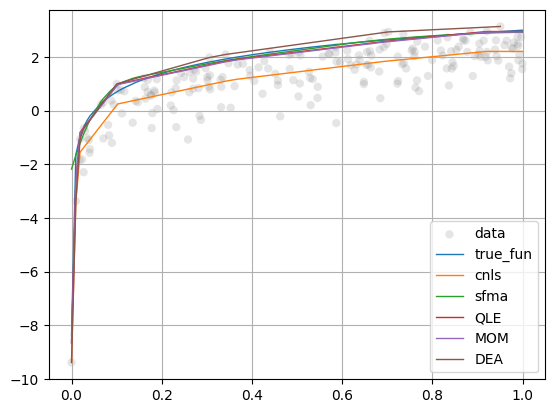

In [59]:
plt.scatter(df_cnls_homosk['x'], df_cnls_homosk['y'], color= "gray", edgecolor="none", alpha=0.2) 
plt.plot(df_cnls_homosk['x'], df_cnls_homosk['y_true'], linewidth = 1)
plt.plot(df_cnls_homosk['x'], df_cnls_homosk['value'], linewidth = 1)
plt.plot(df_sfma_homosk['x'], df_sfma_homosk['value'], linewidth = 1)
plt.plot(df_qle_homosk['x'], df_qle_homosk['value'], linewidth = 1)
plt.plot(df_mom_homosk['x'], df_mom_homosk['value'], linewidth = 1)
plt.plot(df_dea_homosk['x'],df_dea_homosk['y'], linewidth = 1)
plt.legend(['data','true_fun','cnls','sfma','QLE','MOM','DEA'])
plt.grid()

## Homoskedastic

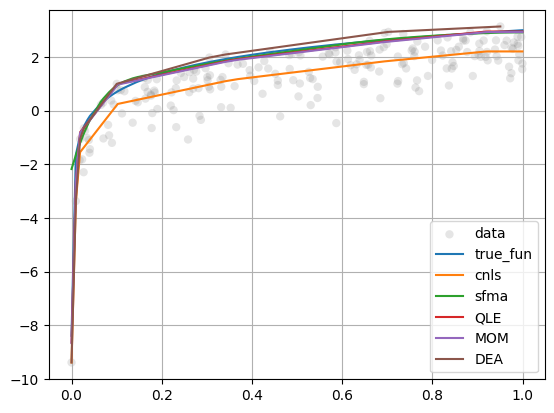

In [60]:
comp_ = compare()
comp_.plot_all(df_cnls_homosk,df_qle_homosk,df_mom_homosk,df_sfma_homosk, df_dea_homosk)

In [61]:
comp_.mse_all(df_cnls_homosk,df_qle_homosk,df_mom_homosk,df_sfma_homosk)

mse_QLE: 0.012270921450309866
mse_MOM: 0.014771718339381703
mse_cnls: 0.6349401062295779
mse_sfma: 0.2004961037548632


## Heteroskedastic

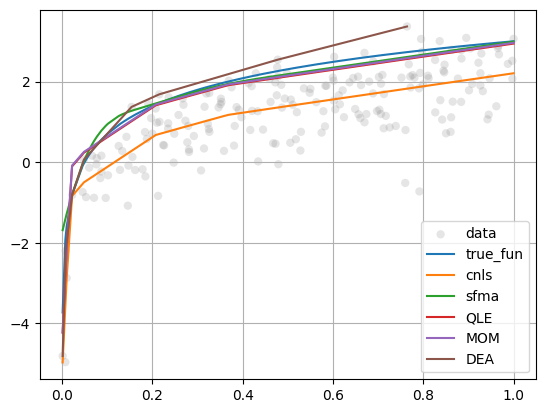

In [48]:
comp_.plot_all(df_cnls_heterosk,df_qle_heterosk,df_mom_heterosk,df_sfma_heterosk, df_dea_heterosk)

In [49]:
comp_.mse_all(df_cnls_heterosk,df_qle_heterosk,df_mom_heterosk,df_sfma_heterosk)

mse_QLE: 0.032449551356617846
mse_MOM: 0.027742935904873908
mse_cnls: 0.7630131205607782
mse_sfma: 0.03562922324261262
